# Real backend simulations

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from sampler_solver_WORKS_one_ancilla import sampler_solver
from merge_methods_CHAIN import solve_master_equation
from qiskit_aer import AerSimulator
import numpy as np
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeTorino


service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-ikerbasque/upv-ehu/dynamics-of-mole',
    token='8b44f1c0867c1a11e554cae2f6201ed52dcd07edff18e845fed56d899f3992a9f773c47aab0332d767425d6f57f3ee862f5d3b330ae3cc971e5f9e741206fe7b'
)


backend = service.backend('ibm_fez')
#fake_backend = FakeTorino()
#backend = AerSimulator()

optimization_level = 3
options = {'default_shots' : 10**4}

omega_c = 1.1
n = 2
kappa = [1.1]
omega_m = [0.8]*n
g = [0.01]*(2*(n-1))
gamma = [0.8*(10**-6)]*n
initial_state = [0]*(2**n)
initial_state[-1] = 1
t = np.linspace(0, 750, 250)
r = 2

evs_qc = sampler_solver(n, omega_m, omega_c, gamma, g, kappa, t, r, initial_state, backend, optimization_level, options, 'one ancilla')
evs_markov = solve_master_equation(n, omega_m, omega_c, gamma, kappa, g, t, initial_state, 'markovian')

np.savez('qc_populations_ibm_marrakesh_2_ts_v4_no_SWAPS', evs_qc)
np.savez('markovian_populations_ibm_marrakesh_2_ts_v4_no_SWAPS', evs_markov)

KeyboardInterrupt: 

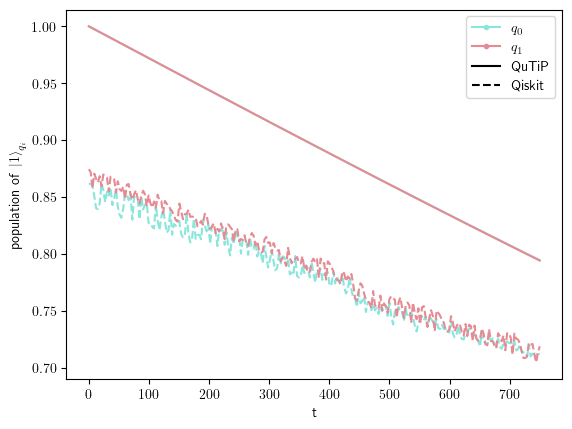

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
from generate_complementary_colors import generate_complementary_colors

colors = generate_complementary_colors(n, 'pastel', 'turquoise')

for key in evs_qc:

    plt.plot(t, evs_markov[key], linestyle = 'solid', color = colors[int(key)])
    plt.plot(t, evs_qc[key], linestyle = 'dashed', color = colors[int(key)])
    plt.plot(np.NaN, np.NaN, marker = '.', color = colors[int(key)], label = f'$q_{int(key)}$')

plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'solid', label = 'QuTiP')
plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'dashed', label = 'Qiskit')
plt.xlabel('t')
plt.ylabel('population of $\\left.|1 \\right>_{q_i}$')
plt.legend()
plt.savefig('two_qubit_real_backend_sim_one_trotter')
plt.show()